In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [2]:
def Nakanshi03(x,y,z):         #Eingabe in kpc
    R=np.sqrt(x**2+y**2)
    exp1 = np.exp(-R/2.4)
    exp2 = np.exp(-((R-9.5)/4.8)**2)
    Plane = 0.94*(0.6*exp1+0.24*exp2)
    scaleheight = 1.06*(116.3+19.3*R+4.1*R**2-0.05*R**3)
    return Plane*np.exp(np.log(2)*(-(z/scaleheight)**2))

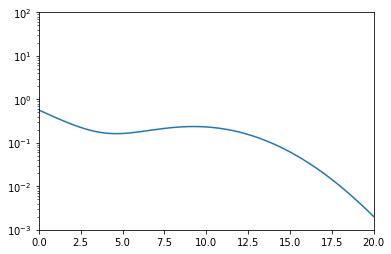

In [5]:
x=np.linspace(0,20,1000)

plt.figure()
plt.plot(x,Nakanshi03(x,0,0),label='y=0,z=0')
plt.yscale('log')
plt.axis([0,20,10**-3,10**2])
plt.show()

100


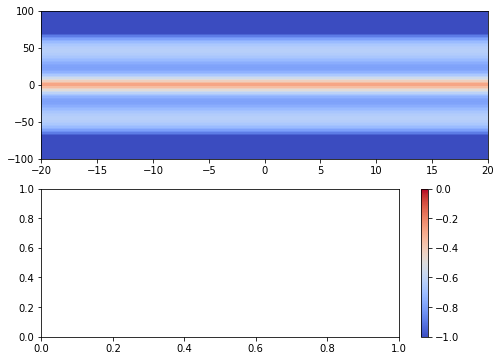

In [3]:
fig,ax=subplots(2,1,figsize=(8,6))
x=np.linspace(-20,20,100)
y=np.linspace(-20,20,100)
z=np.linspace(-100,100,100)

xz,zx=np.meshgrid(x,z)
print(x.shape[0])
Werte =np.zeros((int(x.shape[0]),int(z.shape[0])))
for i in range(x.shape[0]):
    for j in range(z.shape[0]):
        Werte[i,j]=np.log10(Nakanshi03(x[i],0,z[i]))

p=ax[0].pcolor(xz,zx,Werte,cmap=cm.coolwarm,vmin=-1,vmax=0)
cb=colorbar(p)

plt.show()


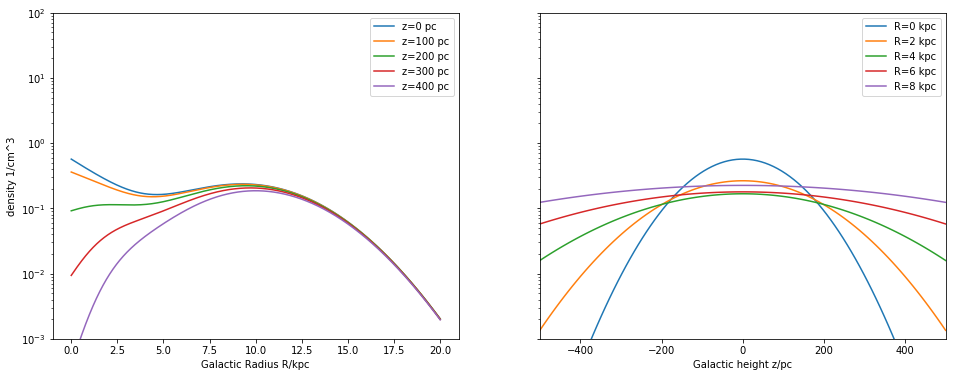

In [16]:
x=np.linspace(0,20,1000)

fig,axs=subplots(1,2,figsize=(16,6),sharey=True)
for i in range(5):
    axs[0].plot(x,Nakanshi03(0,x,100*i),label='z={} pc'.format(100*i))
plt.yscale('log')
plt.axis([0,20,10**-3,10**2])
axs[0].legend()
axs[0].set_xlabel('Galactic Radius R/kpc')
axs[0].set_ylabel('density 1/cm^3')

z=np.linspace(-500,500,100)


for i in range(5):
    axs[1].plot(z,Nakanshi03(i*2,0,z),label='R={} kpc'.format(2*i))
plt.yscale('log')
plt.axis([-500,500,10**-3,10**2])
plt.legend()
axs[1].set_xlabel('Galactic height z/pc')

plt.savefig('/home/home1/jdo/Dokumente/Graphen/12_Nakanshi03_HI_r_z_plots.png')
plt.show()

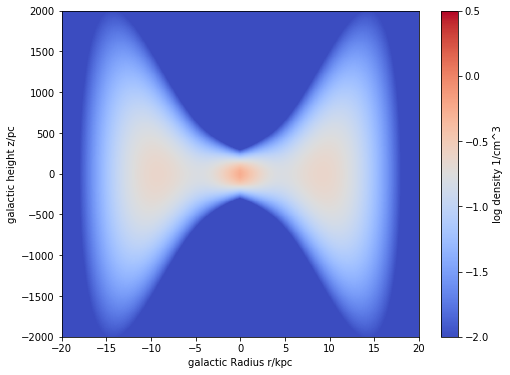

In [30]:
R = np.linspace(-20,20,1000)
z = np.linspace(-2000,2000,1000)

Rz,zR = np.meshgrid(R,z)

fig, ax=subplots(figsize=(8,6))
p=ax.pcolor(Rz,zR,np.log10(Nakanshi03(Rz,0,zR)),cmap=cm.coolwarm,vmin=-2,vmax=0.5)
cb=colorbar(p,label='log density 1/cm^3')
ax.set_ylim(-2000,2000)
ax.set_xlim(-20,20)
ax.set_xlabel('galactic Radius r/kpc')
ax.set_ylabel('galactic height z/pc')
plt.savefig('/home/home1/jdo/Dokumente/Graphen/15_Nakanshi03_Rz_Ebene.png')
plt.show()